In [76]:
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import BatchNormalization
from keras.regularizers import l2
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras import backend as K
import os
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score


base_dir = 'Datasets'
train_dir = 'Datasets/train'
test_dir = 'Datasets/test'
train_pumba_dir = 'Datasets/train/pumba'
train_surik_dir = 'Datasets/train/surik'
test_pumba_dir = 'Datasets/test/pumba'
test_surik_dir = 'Datasets/test/surik'

pumba_tr = len(os.listdir(train_pumba_dir))
surik_tr = len(os.listdir(train_surik_dir))
pumba_test = len(os.listdir(test_pumba_dir))
surik_test = len(os.listdir(test_surik_dir))
total_test = pumba_test + surik_test
total_train = pumba_tr + surik_tr

num_classes = 2
IMG_SHAPE = 80 # размерность 80x80
        
model = keras.models.load_model('BinaryClassifier_model_87.h5', compile=False)

image_generator_1 = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images)
image_generator_2 = ImageDataGenerator(rotation_range=45, vertical_flip=True)
image_generator_3 = ImageDataGenerator(rotation_range=30)
image_generator_4 = ImageDataGenerator(horizontal_flip=True)
image_generator_5 = ImageDataGenerator()

# batch_size = len(x_test)

test_data_gen_1 = image_generator_1.flow_from_directory(batch_size=total_test,
                                                          directory=test_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode="binary")
test_data_gen_2 = image_generator_2.flow_from_directory(batch_size=total_test,
                                                          directory=test_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode="binary")
test_data_gen_3 = image_generator_3.flow_from_directory(batch_size=total_test,
                                                          directory=test_dir,
                                                          shuffle=True,
                                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode="binary")
test_data_gen_4 = image_generator_4.flow_from_directory(batch_size=total_test,
                                                          directory=test_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode="binary")

test_data_gen_5 = image_generator_5.flow_from_directory(batch_size=total_test,
                                                          directory=test_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode="binary")

test_images_1, test_labels_1 = next(test_data_gen_1)
test_images_2, test_labels_2 = next(test_data_gen_2)
test_images_3, test_labels_3 = next(test_data_gen_3)
test_images_4, test_labels_4 = next(test_data_gen_4)
test_images_5, test_labels_5 = next(test_data_gen_5)

test_images = np.concatenate((test_images_1, test_images_2))
test_images = np.concatenate((test_images, test_images_3))
test_images = np.concatenate((test_images, test_images_4))
test_images = np.concatenate((test_images, test_images_5))

test_labels = np.concatenate((test_labels_1, test_labels_2))
test_labels = np.concatenate((test_labels, test_labels_3))
test_labels = np.concatenate((test_labels, test_labels_4))
test_labels = np.concatenate((test_labels, test_labels_5))

print(len(test_images))
print(len(test_labels))

Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


/home/vladislav/1cloud/1cloud/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


300
300


In [77]:
predicted = model.predict(test_images)

In [78]:
for i in range(len(predicted)):
    predicted[i] = np.around(predicted[i])
predicted_ = []
for i in predicted:
    predicted_.append(i[1])
    
predicted = predicted_

Accuracy:	 0.82
Recall:		 0.7 		 0.94
Precision:	 0.92105 	 0.75806
F1:		 0.79545 	 0.83929


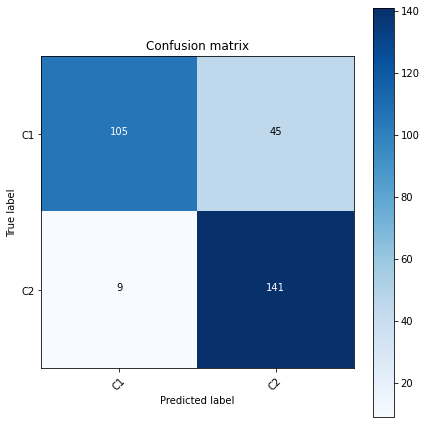

In [80]:
def plot_confusion_matrix(cm, classes, normalize=False, 
                          title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
recall = recall_score(test_labels, predicted, average=None)
precision = precision_score(test_labels, predicted, average=None)
accuracy = accuracy_score(test_labels, predicted)
f1 = f1_score(test_labels, predicted,  average=None)


print("Accuracy:\t", round(accuracy, 5))
print("Recall:\t\t", round(recall[0] ,5 ), '\t\t', round(recall[1] ,5 ))
print("Precision:\t", round(precision[0] ,5 ), '\t', round(precision[1] ,5 ))
print("F1:\t\t", round(f1[0] ,5 ), '\t', round(f1[1] ,5 ))    
    
fig = plt.gcf()
fig.set_size_inches(6, 6)
cnf_matrix = confusion_matrix(test_labels, predicted)
plot_confusion_matrix(cnf_matrix, [f'C{i+1}' for i in range(num_classes)], 
                      title='Confusion matrix', normalize=False)
